<a href="https://colab.research.google.com/github/MattiaGatto/k-Means-Hierarchical_Clustering/blob/main/k_Means%26Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Obiettivo esercitazione
L'esercitazione ha l'obiettivo di applicare su un dataset reale i differenti algoritmi di clustering, in particolare k-Means e Hierarchical Clustering.

Si effettueranno, inoltre, differenti variazioni all'applicazione standard degli algoritmi per comprendere l'utilizzo dei differenti iper-parametri a seconda delle documentazioni ufficiali dei metodi utilizzati.

# Descrizione ed analisi del dataset
Il dataset che verrà utilizzato tratta informazioni circa la fedeltà dei clienti che hanno sottoscritto una tessera punti. Tali informazioni raccolte potrebbero ritornare utili, ai fini di business, per pianificare potenziali strategie economiche ed attuare delle promozioni mirate in base alla propria clientela.

Le features presenti nel dataset sono le seguenti:

* **CustomerID**: Codice univoco identificativo del cliente.
* **Gender**: Sesso dell'utente.
* **Age**: Età dell'utente.
* **Annual Income (k$)**: Spesa annuale dell'utente fatta presso il centro * **commerciale di riferimento
* **Spending Score (1-100)**: Punteggio assegnato dal centro commerciale in base al comportamento del cliente e alla natura della spesa

# Analisi esplorativa del dataset

In [6]:
#Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')
data_root='/content/drive/My Drive/project'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Import delle l'analisi esplorativa dei dati
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

# import delle librerie richieste per l'applicazione di algoritmi di clustering
import sklearn
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cut_tree
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler

## Caricamento in memoria del dataset
Con il seguente comando si effettua il caricamento in memoria di quanto contenuto nel dataset 'OnlineRetail.csv'.

Per condurre una prima fase di analisi esplorativa e comprendere la natura dei dati a disposizione, si stampano di seguito i primi cinque esempi presenti nel dataset:

In [10]:
store = pd.read_csv('/content/drive/MyDrive/project/Dataset/Mall_Customers.csv')
store

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Per ottenere informazioni statistiche inerenti ciascuna feature a disposizione, mediante il metodo describe() si è provveduto al calcolo delle seguenti informazioni:

* **count**: conteggio del numero di esempi per la feature selezionata
* **mean**: media aritmetica per la feature selezionata
* **std**: deviazione standard per la feature selezionata
* **min**: valore minimo presentato dagli esempi per la feature selezionata
* **25%**: primo quartile calcolato sugli esempi per la feature selezionata
* **50%**: secondo quartile calcolato sugli esempi per la feature selezionata
* **75%**: terzo quartile calcolato sugli esempi per la feature selezionata
* **max**: valore massimo presentato dagli esempi per la feature selezionata

In [11]:
store.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Successivamente, al fine di comprendere le dimensioni (in termini di esempi e di features a disposizione), mediante apposito attributo si stampano il numero di righe e di colonne del DataFrame:

In [12]:
store.shape

(200, 5)

Al fine di ottenere una descrizione complessiva del Dataframe (e dunque del relativo dataset) caricato, mediante il metodo info() si sono ottenute le seguenti informazioni:

* **#**: numero di feature presente nel DataFrame
* **Column**: intestazione delle features nel DataFrame
* **Non-Null Count**: contatore di valori non nulli per ogni feature presente nel DataFrame
* **Dtype**: tipo di dato memorizzato per ogni feature presente nel DataFrame

In [13]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [14]:
store.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


---
# Visualizzazione dei dati

In [15]:
#Set dello stile dei grafici
plt.style.use('fivethirtyeight')

## Istogramma

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

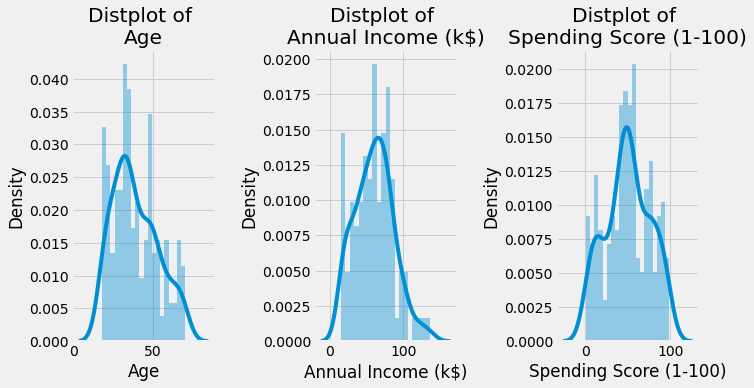

In [30]:
plt.figure(1 , figsize = (10 , 5))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.2 , wspace = 0.7)
    sns.distplot(store[x] , bins = 20)
    plt.title('Distplot of \n{}'.format(x))
plt.show()

## CountPlot per Genere

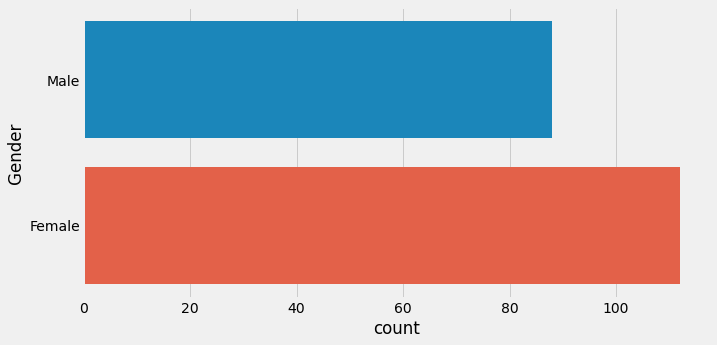

In [31]:
plt.figure(1 , figsize = (10 , 5))
sns.countplot(y = 'Gender' , data = store)
plt.show()

## Studio delle features disponibili

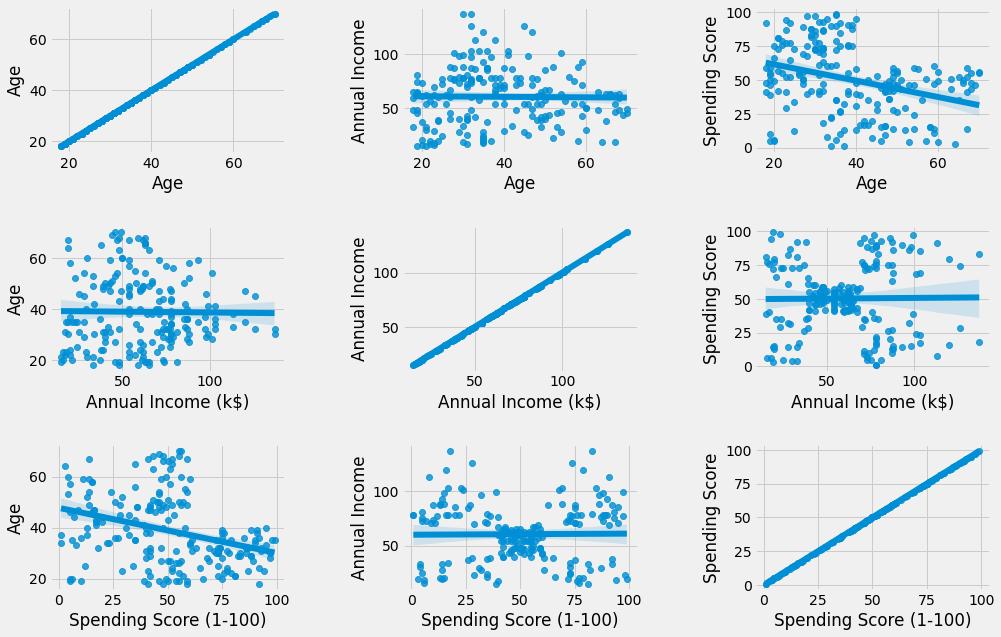

In [35]:
plt.figure(1 , figsize = (15 , 10))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = store)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

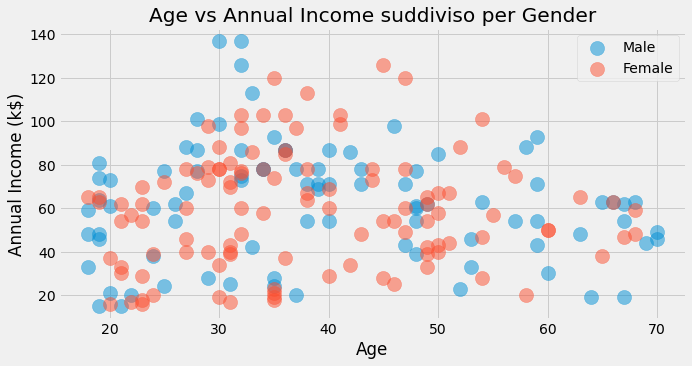

In [36]:
plt.figure(1 , figsize = (10 , 5))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = store[store['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income suddiviso per Gender')
plt.legend()
plt.show()

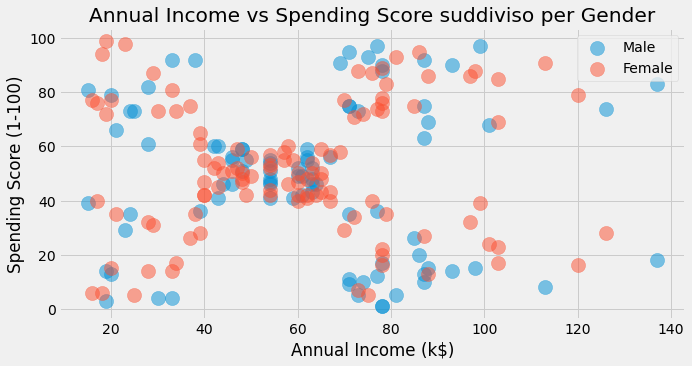

In [37]:
plt.figure(1 , figsize = (10 , 5))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = store[store['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score suddiviso per Gender')
plt.legend()
plt.show()

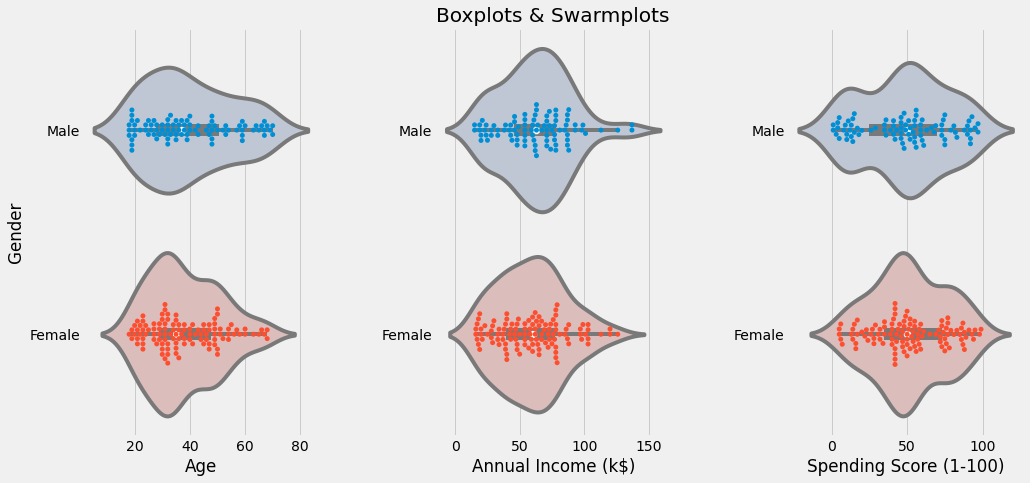

In [38]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = store , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = store)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

# Clustering via k-Means
k-Means è un algoritmo di clustering non supervisionato, tra i più semplici e popolari messi a disposizione dalla libreria Sci-Kit.

Un cluster è definito come un insieme di punti dati che il clustering è uno degli algoritmi di apprendimento automatico non supervisionati più semplici e popolari.

Definito il valore del parametro k, che esplica il numero di centroidi da identificare nel dataset. Un centroide è la posizione immaginaria o reale che rappresenta il centro di ciascun cluster.

L'algoritmo prevede l'assegnazione di ogni punto dati viene a ciascuno dei cluster utilizzando la nozione di distanza. In altre parole, l'algoritmo k-Means identifica il numero k di centroidi e quindi assegna ogni punto dati al cluster più vicino, mantenendo i centroidi i più piccoli possibili.

Per clusterizzare i dati presenti nel dataset, l'algoritmo k-Means identifica randomicamente un primo gruppo di centroidi e tali sono utilizzati come punti iniziali per ogni cluster. Successivamente, si effettua il ricalcolo dei centroidi ogni qualvolta un nuovo esempio è assegnato al cluster, al fine di ottimizzare le posizioni dei centroidi. Il processo di ottimizzazione termina quando si raggiunge il numero delle iterazioni massime (definite) oppure quando si è giunti alla convergenza del metodo.

## kMeans++
Nel k-means classico, si utilizza un seme casuale per posizionare i centroidi iniziali, che a volte può provocare cattivi raggruppamenti o una lenta convergenza se i centroidi iniziali sono scelti male. Un modo per risolvere questo problema è eseguire l'algoritmo k-mean più volte su un set di dati e scegliere il modello con le migliori prestazioni in termini di SSE.

Un'altra strategia è quella di posizionare i centroidi iniziali molto distanti tra loro tramite l'algoritmo k-means ++, che porta a risultati migliori e più coerenti rispetto ai classici k-mean

Per utilizzare il k-Means++ basterà porre l'attributo init = 'k-means++' (che è già posto di default). Per utilizzare il k-Means classico bisognerà porre l'attributo init = 'random'.

## Segmentazione dei clienti Age vs Spending Score

In [39]:
# Metodo k-Means con un numero di clusters arbitrario.
# - n_clusters: numero di cluster desiderati - limitazione del k-Means;
# - n_init: esegue l'algoritmo n volte in modo indipendente, con diversi centroidi casuali per scegliere il modello finale come quello con il SSE più basso.
# - max_iter: indica il numero massimo di iterazioni per ogni singola esecuzione. 

X1 = store[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    method = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300, tol=0.0001, random_state= 1))
    method.fit(X1)
    inertia.append(method.inertia_)

In [40]:
#Stampa delle etichette relative ai cluster
method.labels_

array([7, 5, 8, 5, 7, 5, 2, 1, 6, 5, 6, 1, 6, 5, 2, 5, 9, 4, 9, 1, 9, 5,
       2, 5, 6, 5, 9, 4, 9, 1, 6, 5, 6, 1, 2, 5, 2, 5, 9, 5, 3, 1, 9, 4,
       9, 4, 0, 7, 7, 7, 0, 4, 4, 3, 0, 0, 0, 3, 4, 0, 3, 4, 3, 0, 3, 4,
       0, 3, 4, 7, 3, 0, 3, 3, 3, 4, 0, 0, 4, 0, 3, 0, 3, 0, 4, 0, 0, 4,
       4, 0, 3, 7, 0, 9, 7, 4, 0, 4, 0, 7, 7, 0, 3, 4, 0, 7, 3, 0, 3, 3,
       3, 4, 9, 7, 7, 7, 3, 0, 0, 0, 4, 9, 0, 1, 7, 5, 9, 1, 6, 5, 2, 5,
       7, 5, 8, 1, 2, 5, 8, 5, 6, 1, 7, 1, 8, 1, 9, 5, 2, 1, 2, 1, 2, 5,
       2, 1, 2, 5, 2, 5, 9, 1, 8, 1, 9, 5, 2, 1, 9, 4, 2, 5, 2, 1, 6, 1,
       6, 5, 6, 1, 9, 1, 2, 1, 9, 1, 9, 5, 2, 1, 2, 5, 2, 1, 2, 5, 9, 5,
       2, 1], dtype=int32)

Trovare il numero ottimale di clusters
### Metodo Elbow
Al fine di identificare il giusto numero per il parametro _nclusters è possibile definire un metodo grafico che consenta, variando il parametro mediante una lista di valori espressi, di poter valutare l'attributo intertia (ovvero la somma della radice delle distanze dei campioni dal centro del cluster più vicino).

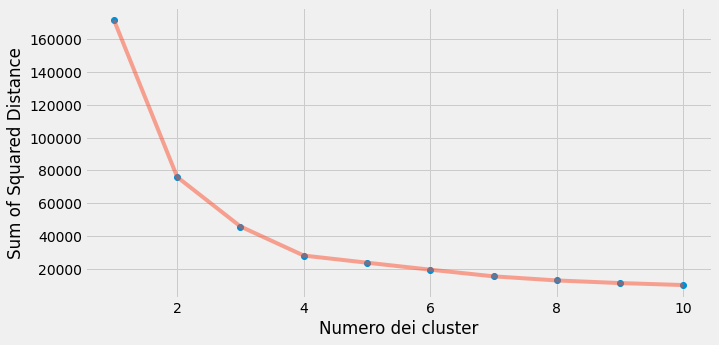

In [41]:
# Plot del valore della somma della radice delle distanze al crescere del numero dei cluster

plt.figure(1 , figsize = (10 ,5))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Numero dei cluster') , plt.ylabel('Sum of Squared Distance')
plt.show()

Ottenuti i risultati visibili dal precedente grafico, si sceglie il valore 4 per il parametro _nclusters e si riesegue nuovamente l'algoritmo k-Means registrando le relative etichette.

In [42]:
method = (KMeans(n_clusters = 4, init='k-means++', n_init = 10, max_iter=300, tol=0.0001, random_state= 1))
method.fit(X1)
labels1 = method.labels_
centroids1 = method.cluster_centers_
#Stampa delle etichette predette
method.labels_

array([2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 2, 1, 0, 2, 0,
       1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 3, 2,
       1, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2,
       2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 0, 2, 0, 3, 0, 1, 0, 1, 0,
       2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

## Plot delle regioni identificate

In [43]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = method.predict(np.c_[xx.ravel(), yy.ravel()]) 

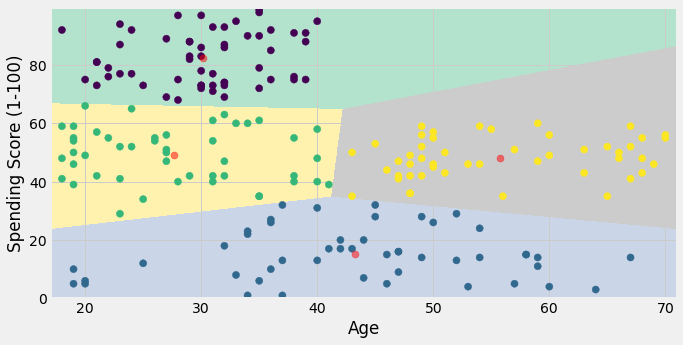

In [44]:
plt.figure(1 , figsize = (10 , 5) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age', y = 'Spending Score (1-100)', data = store, c = labels1, s = 50 )
plt.scatter(x = centroids1[: , 0], y =  centroids1[: , 1], s = 50, c = 'red', alpha = 0.5)
plt.ylabel('Spending Score (1-100)'), plt.xlabel('Age')
plt.show()

## Segmentazione dei clienti Annual Income vs Spending Score

In [46]:
X2 = store[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    method = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300, tol=0.0001, random_state= 1))
    method.fit(X2)
    inertia.append(method.inertia_)

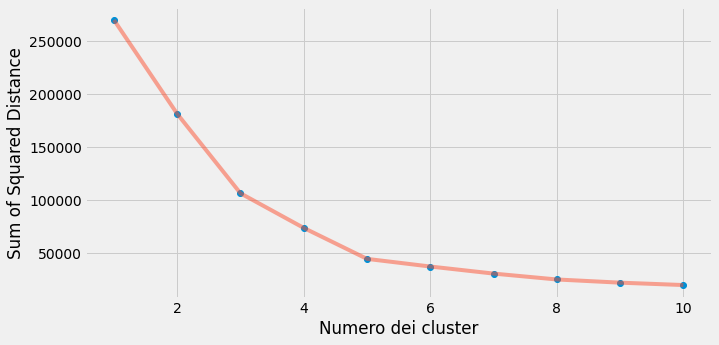

In [47]:
# Plot del valore della somma della radice delle distanze al crescere del numero dei cluster

plt.figure(1 , figsize = (10 ,5))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Numero dei cluster') , plt.ylabel('Sum of Squared Distance')
plt.show()

Ottenuti i risultati visibili dal precedente grafico, si sceglie il valore 5 per il parametro _nclusters e si riesegue nuovamente l'algoritmo k-Means registrando le relative etichette.

In [48]:
method = (KMeans(n_clusters = 5, init='k-means++', n_init = 10, max_iter=300, tol=0.0001, random_state= 1))
method.fit(X2)
labels2 = method.labels_
centroids2 = method.cluster_centers_

In [49]:
#Stampa delle etichette predette
method.labels_

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

## Plot n2 delle regioni identificate

In [50]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = method.predict(np.c_[xx.ravel(), yy.ravel()]) 

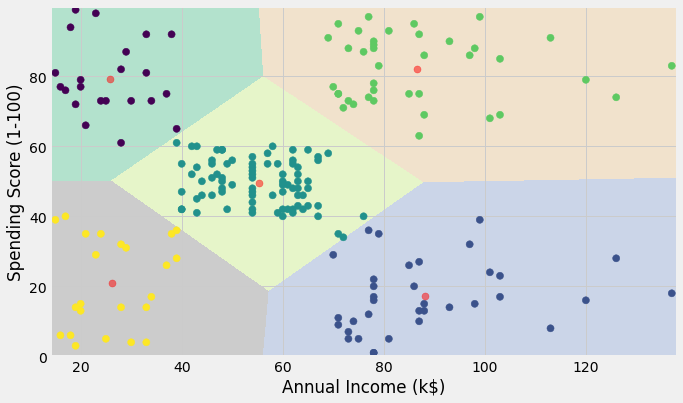

In [51]:
plt.figure(1, figsize = (10 , 6))
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = store , c = labels2, s = 50)
plt.scatter(x = centroids2[: , 0], y =  centroids2[: , 1], s = 50, c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)'), plt.xlabel('Annual Income (k$)')
plt.show()

## Segmentazione dei clienti Age vs Annual Income vs Spending Score

In [52]:
X3 = store[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    method = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, tol=0.0001,  random_state= 1))
    method.fit(X3)
    inertia.append(method.inertia_)

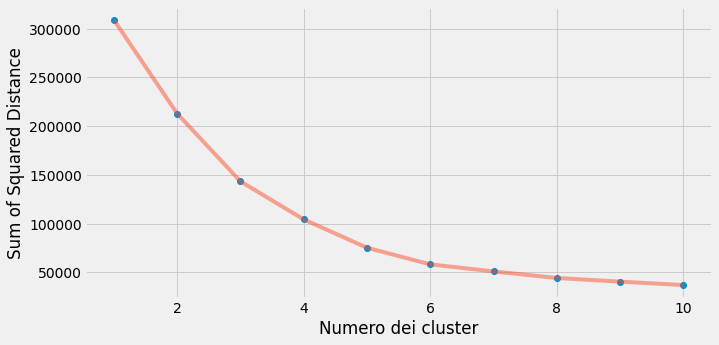

In [53]:
# Plot del valore della somma della radice delle distanze al crescere del numero dei cluster

plt.figure(1 , figsize = (10 ,5))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Numero dei cluster') , plt.ylabel('Sum of Squared Distance')
plt.show()

Analisi di Silhouette
L'analisi di Silhouette si riferisce a un metodo di interpretazione e convalida della coerenza dei dati rispetto ai cluster identificati.

Il valore dek coefficiente di Silhouette è una misura di quanto un oggetto sia simile al proprio cluster (coesione) rispetto ad altri cluster (separazione). Tale valore è espresso in un intervallo [-1, +1], dove un valore alto indica che l'esempio è ben adattato al proprio cluster e scarsamente abbinato ai cluster vicini. Se la maggior parte degli oggetti ha un valore elevato, la suddivisione degli esempi nei rispettivi cluster è appropriata. Se molti punti, invece, hanno un valore basso o negativo, la suddivisione degli esempi nei cluster definiti potrebbe risultare inappropriata.

L'analisi di Silhouette può essere condotta utilizzando una qualsiasi metrica di distanza, come la distanza euclidea o la distanza di Manhattan. In particolare, può essere espressa come segue:
**silhouette score=p−q / max(p,q)**
 
**p**  è la distanza media tra il punto e il centroide del cluster più vicino.

**q**  è la distanza media intra-cluster definita su tutti i punti presenti nel proprio cluster.

In [54]:
# Definizione della lista del numero di cluster da testare
range_n_clusters = list(x for x in range (2,10+1))

for num_clusters in range_n_clusters:
    method = KMeans(n_clusters = num_clusters ,init='k-means++', n_init = 10 ,max_iter=300, tol=0.0001,  random_state= 1)
    method.fit(X3)
    cluster_labels = method.labels_
    # Calcolo coefficiente di silhouette
    silhouette_avg = silhouette_score(X3, cluster_labels)
    print("Per n_clusters={0}, il coefficiente di Silhouette è pari a {1}".format(num_clusters, silhouette_avg))

Per n_clusters=2, il coefficiente di Silhouette è pari a 0.293166070535953
Per n_clusters=3, il coefficiente di Silhouette è pari a 0.3839349967742105
Per n_clusters=4, il coefficiente di Silhouette è pari a 0.40546302077733304
Per n_clusters=5, il coefficiente di Silhouette è pari a 0.44428597560893024
Per n_clusters=6, il coefficiente di Silhouette è pari a 0.4523443947724053
Per n_clusters=7, il coefficiente di Silhouette è pari a 0.44125523526699084
Per n_clusters=8, il coefficiente di Silhouette è pari a 0.4280971079746162
Per n_clusters=9, il coefficiente di Silhouette è pari a 0.4137641526186506
Per n_clusters=10, il coefficiente di Silhouette è pari a 0.3852650864688328


Ottenuti i risultati visibili dal precedente grafico, si sceglie il valore 6 per il parametro _nclusters e si riesegue nuovamente l'algoritmo k-Means registrando le relative etichette.

In [55]:
method = (KMeans(n_clusters = 6, init='k-means++', n_init = 10, max_iter=300, tol=0.0001, random_state= 1))
method.fit(X3)
labels3 = method.labels_
centroids3 = method.cluster_centers_

In [56]:
#Stampa delle etichette predette
method.labels_

array([4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 3, 5, 3, 0,
       4, 5, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0,
       0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [57]:
# Assegnazione delle etichette a ciascun esempio presente nel DataFrame
store['Cluster_Id'] = method.labels_
# Stampa dei primi 5 esempi
store.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Id
0,1,Male,19,15,39,4
1,2,Male,21,15,81,5
2,3,Female,20,16,6,4
3,4,Female,23,16,77,5
4,5,Female,31,17,40,4


## BoxPlot ottenuti con k-Means

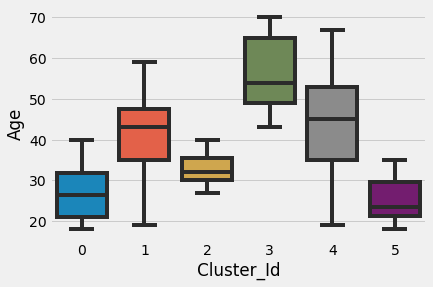

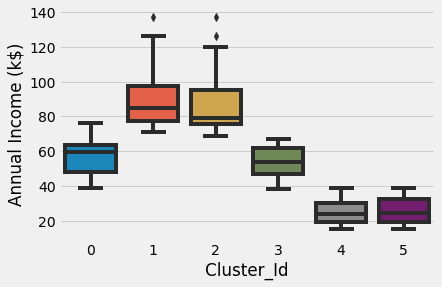

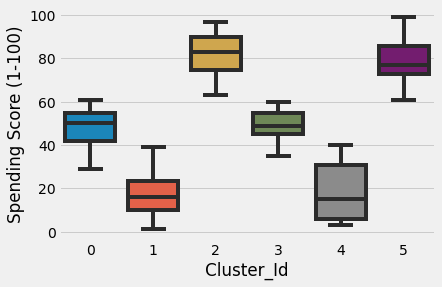

In [58]:
features_list = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for feature in features_list:
    sns.boxplot(x='Cluster_Id', y=feature, data=store)
    plt.show()

# Clustering gerarchico
Gli algoritmi gerarchici in genere clusterizzano i dati usando le misure di distanza. Tuttavia, l'uso delle funzioni di distanza non è obbligatorio. Molti algoritmi gerarchici utilizzano altri metodi di clustering, ad esempio metodi density-based o graph-based, come subroutine per la costruzione della gerarchia.

Uno dei motivi principali di utiulizzo di tale modalità di clustering è che diversi livelli di granularità del clustering forniscono dei dettagli specifici per l'applicazione. Ciò fornisce una tassonomia di cluster, che possono essere esplorati sulla base di tali dettagli semantici.

L'organizzazione gerarchica consente la navigazione manuale molto conveniente per un utente, specialmente quando il contenuto dei cluster può essere descritto in modo semanticamente comprensibile. In altri casi, tali organizzazioni gerarchiche possono essere utilizzate dagli algoritmi di indicizzazione, rispetto alle macroaree di riferimento. Inoltre, tali metodi possono talvolta essere utilizzati anche per creare cluster "piatti" migliori (dove tutte le categorie sono posto allo stesso livello). Alcuni metodi gerarchici agglomerativi e metodi di divisione, possono fornire cluster di qualità migliore rispetto ai metodi di partizionamento come k-Means, sebbene con un costo computazionale più elevato.

Esistono due tipi di algoritmi gerarchici, a seconda di come viene costruito l'albero gerarchico dei cluster:

* Metodi bottom-up (agglomerativi): i singoli punti dati vengono successivamente agglomerati in cluster di livello superiore. La principale variazione tra i diversi metodi è nella scelta della funzione obiettivo utilizzata per fondere i cluster.
* Metodi top-down (divisivi): un approccio top-down viene utilizzato per partizionare successivamente i punti in una struttura ad albero. Un algoritmo di clustering piatto può essere utilizzato per il partizionamento in un determinato passo. Tale approccio offre un'enorme flessibilità in termini di scelta del compromesso tra l'equilibrio nella struttura ad albero e l'equilibrio nel numero di punti in ciascun nodo della struttura ad albero.


## Single Linkage:
Nel clustering che sfrutta la modalità di collegamento single linkage, la distanza tra due cluster è definita come la più piccola distanza calcolabile tra due punti in ciascun cluster. Per esempio, la distanza tra il cluster “r” e “s” è uguale alla lunghezza dell'arco tra i due punti più vicini, così come visibile dalla figura riportata.

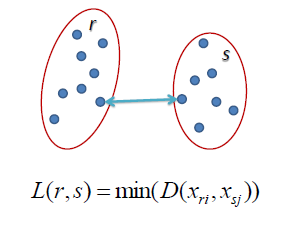


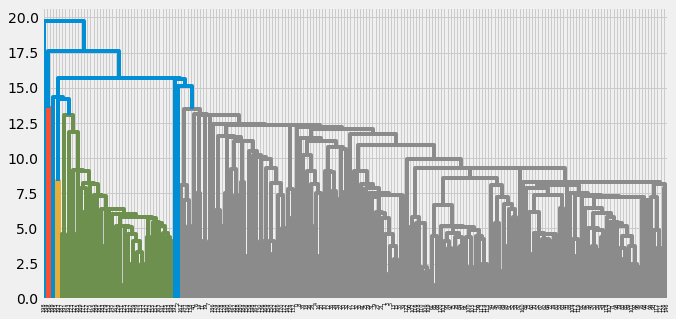

In [59]:
# Applicazione del metodo Single Linkage
plt.figure(figsize = (10,5))
single_linkage = linkage(X3, method="single", metric='euclidean')
dendrogram(single_linkage)
plt.show()

## Complete Linkage

Nel metodo Complete Linkage, la distanza tra due cluster è definita come la più grande distanza tra due punti in ciascun cluster.

Per esempio, la distanza tra i cluster “r” e “s” è uguale alla lunghrzza dell'arco tra i due punti più distanti dei due cluster.

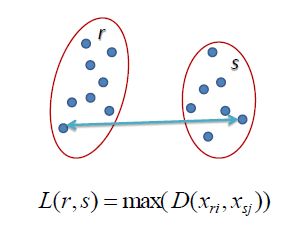

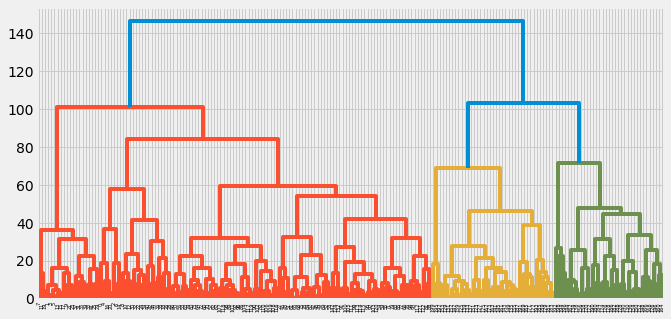

In [60]:
# Applicazione del metodo Complete linkage
plt.figure(figsize = (10,5))
complete_linkage = linkage(X3, method="complete", metric='euclidean')
dendrogram(complete_linkage)
plt.show()

## Average Linkage:

Con il metodo Average Linkage, la distanza tra due cluster è definita come la distanza media presente tra ciascun punto di un cluster con tutti i punti dell'altro cluster.

Per esempio, la distanza tra i cluster “r” e “s” è uguale alla lunghezza mediata dell'arco che connette i punti di un cluster all'altro.

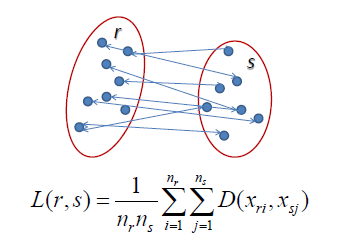


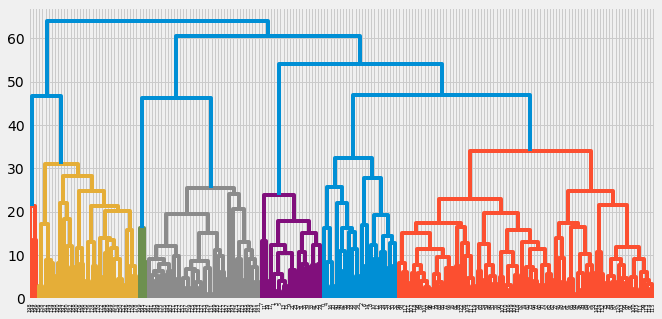

In [61]:
# Applicazione del metodo Average linkage
plt.figure(figsize = (10,5))
avg_linkage = linkage(X3, method="average", metric='euclidean')
dendrogram(avg_linkage)
plt.show()

## Taglio del Dendrogramma in base al valore di K


In [62]:
# Desiderando un numero di cluster pari a 4, si inizializza il parametro n_clusters=4
cluster_labels = cut_tree(complete_linkage, n_clusters=4).reshape(-1, )
#Stampa delle etichette dei cluster
cluster_labels

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 3, 2, 3, 2, 3, 2,
       0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

In [63]:
# Assegnazione delle etichette a ciascun esempio presente nel DataFrame
store['Cluster_Labels'] = cluster_labels
# Stampa dei primi 5 elementi presenti nel DataFrame
store.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Id,Cluster_Labels
0,1,Male,19,15,39,4,0
1,2,Male,21,15,81,5,1
2,3,Female,20,16,6,4,0
3,4,Female,23,16,77,5,1
4,5,Female,31,17,40,4,0


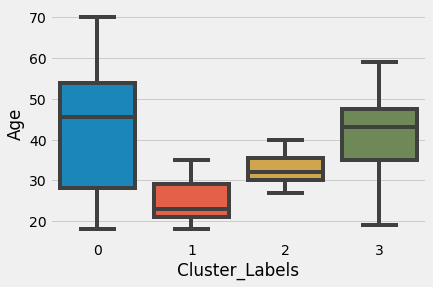

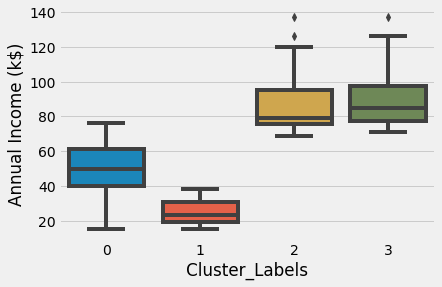

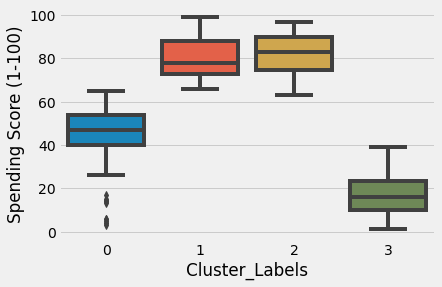

In [64]:
# Plot delle Features

features_list = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for feature in features_list:
    sns.boxplot(x='Cluster_Labels', y=feature, data=store)
    plt.show()

In [65]:
## Numero dei clienti in ciascun cluster
store['Cluster_Labels'].value_counts(ascending=True)

1     20
3     35
2     39
0    106
Name: Cluster_Labels, dtype: int64

### Agglomerative Clustering
Nel clustering agglomerativo, come già accennato, i singoli punti dati vengono agglomerati iterativamente in cluster di livello superiore. Nel primo step, ogni singolo punto costituisce un cluster. Successivamente, si agglomerano insieme via via sempre più punti, andando a costruire cluster sempre più popolati. Il metodo si arresta quando si raggiunge un certo numero di cluster. Nel metodo seguente vengono utilizzati i seguenti parametri:

* n_clusters=3: si desiderano tre cluster come suggerito dal metodo Elbow
* affinity: metrica utilizzata per computare il linkage. Si utilizza la distanza euclidea.
  * euclidean
  * l1
  * l2
  * manhattan
  * cosine
  * precomputed
* linkage: criterio di collegamento da utilizzare. Ne esistono diversi:
  * ward: minimizza la varianza dei cluster che devono essere fusi insieme
  * average: usa la media delle distanze di ogni osservazione nei due insiemi
  * complete: usa la distanza massima tra due punti negli insiemi
  * single: usa la distanza minima tra due insiemi

In [66]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
agglomerative_cluster_labels = ac.fit_predict(X3)

In [67]:
# Assegnazione delle etichette a ciascun esempio presente nel DataFrame
store['Agglomerative_Clustering'] = agglomerative_cluster_labels
# Stampa dei primi 5 elementi presenti nel DataFrame
store.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Id,Cluster_Labels,Agglomerative_Clustering
0,1,Male,19,15,39,4,0,0
1,2,Male,21,15,81,5,1,3
2,3,Female,20,16,6,4,0,0
3,4,Female,23,16,77,5,1,3
4,5,Female,31,17,40,4,0,0


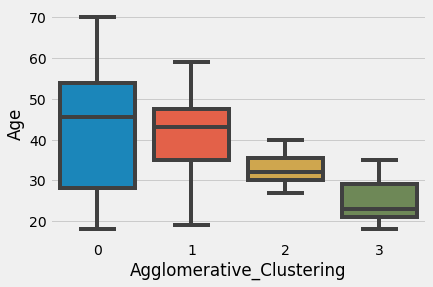

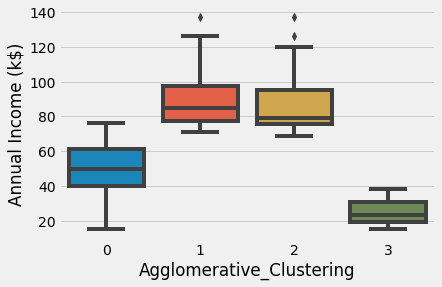

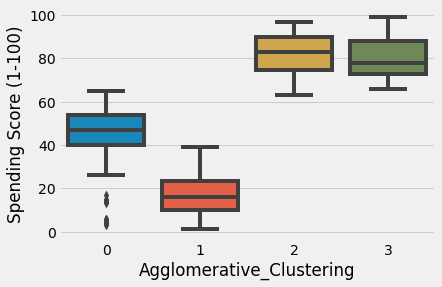

In [68]:
#Plot delle Features

features_list = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for feature in features_list:
    sns.boxplot(x='Agglomerative_Clustering', y=feature, data=store)
    plt.show()

# DBSCAN
DBSCAN è un algoritmo di clustering Density-Based utilizzabile su dataset che presentano punti rumorosi. È un algoritmo non parametrico di clustering basato sulla densità: dato un insieme di punti in uno spazio, raggruppa i punti che sono altamente vicini, contrassegnando come punti anomali i punti che si trovano da soli in regioni a bassa densità.

DBSCAN è uno degli algoritmi di clustering più comuni e anche i più citati nella letteratura scientifica e presenta i seguenti vantaggi:

* Non richiede la specifica a priori di un numero di cluster, a differenza di k-Means
* Gestione accurata dei punti rumorosi
* Robusto in presenza degli outliers
Per DBSCAN, invece, si identificano i seguenti svantaggi:

* Non deterministico: i punti presenti sulle frontiere possono essere assegnati a cluster differenti, in base all'ordine in cui i dati sono processati
* La qualità dei risultati restituiti da DBSCAN dipende dalla misura di distanza usata
* Sensibile al fenomeno della "Curse of dimensionality" in presenza di dataset con un numero di features elevato

In [69]:
from sklearn.cluster import DBSCAN
X3 = StandardScaler().fit_transform(X3)

dbscan = DBSCAN(eps=0.3, min_samples=5, metric = 'euclidean')
dbscan.fit(X3)

DBSCAN(eps=0.3)

In [70]:
dbscan_labels = dbscan.labels_
#Stampa delle etichette dei cluster
dbscan_labels

array([-1,  0, -1,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1,
       -1, -1, -1,  1,  1,  1,  2, -1,  1,  2, -1,  2, -1,  2, -1, -1,  2,
       -1, -1,  2,  3,  4,  4,  4,  5, -1, -1,  5,  3,  4, -1, -1,  3,  5,
        3, -1,  5, -1,  3, -1,  6,  3, -1, -1,  5,  3,  5,  3,  6,  6,  3,
       -1,  5,  3,  6,  7, -1,  7,  7,  7,  6, -1,  6,  6,  6,  7, -1, -1,
       -1, -1, -1, -1, -1, -1,  8, -1, -1, -1,  8, -1, -1, -1,  8, -1,  9,
       -1,  8, -1,  8, -1,  9, -1,  9, -1, -1, -1,  8, -1,  9, -1, -1, -1,
       -1, -1, -1, -1,  8, -1,  8, -1,  9, -1,  9, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [71]:
#Identificazione numero di cluster e punti rumorosi
n_clusters_ = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_ = list(dbscan_labels).count(-1)

print('Numero di cluster stimati: %d' % n_clusters_)
print('Numero di punti rumorosi identificati: %d' % n_noise_)

Numero di cluster stimati: 10
Numero di punti rumorosi identificati: 134


In [72]:
# Assegnazione delle etichette a ciascun esempio presente nel DataFrame
store['DensityBased_Labels'] = dbscan_labels
# Stampa dei primi 5 elementi presenti nel DataFrame
store.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Id,Cluster_Labels,Agglomerative_Clustering,DensityBased_Labels
0,1,Male,19,15,39,4,0,0,-1
1,2,Male,21,15,81,5,1,3,0
2,3,Female,20,16,6,4,0,0,-1
3,4,Female,23,16,77,5,1,3,0
4,5,Female,31,17,40,4,0,0,-1


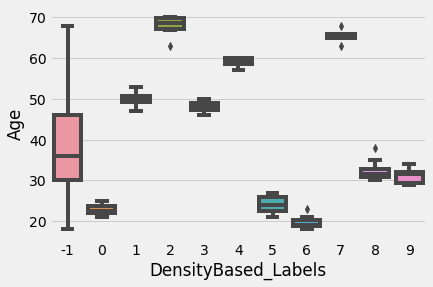

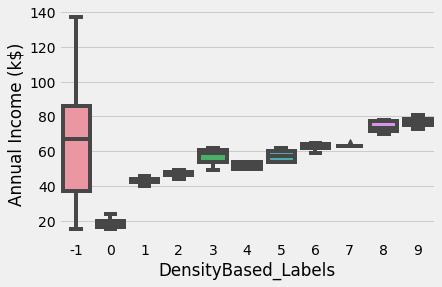

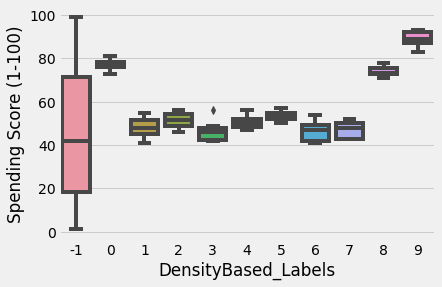

In [73]:
#Plot delle Features

features_list = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for feature in features_list:
    sns.boxplot(x='DensityBased_Labels', y=feature, data=store)
    plt.show()